In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

link = 'https://raw.githubusercontent.com/Mscizor/COMET-FamilyIncomeExpenditure/master/data_mmda_traffic_spatial.csv'

# Central Question: What may cause incidents to occur more often? 
# Quesiton 1: Time (When do these incidents happen more?)
# Question 2: Involved and Time (Does the type of vehicle affect if you'll get into accidents more?)
# Question 3: City/Direction and Time (Where do these incidents happen more?)
traffic_df = pd.read_csv(link)
traffic_df.head()

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,8/20/2018,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
1,8/20/2018,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...
2,8/20/2018,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
3,8/20/2018,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...
4,8/20/2018,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...


In [ ]:
traffic_df['Date'] = pd.to_datetime(traffic_df['Date']) 
traffic_df.head()

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...


## Question 1: When do these incidents happen more?

In [ ]:
traffic_df['Time'] = traffic_df['Time'].astype('string')
traffic_df.dropna(subset=['Time'], inplace=True)
traffic_df['Time'].isnull().any()

False

In [ ]:
def get_hour(str):
  hour = 0
  if str[-2:] == 'PM' or str[-4:] == 'PM M':
    hour += 12
  
  if str[1] == ':' and str[:2] != '12':
    hour += int(str[:1])
  elif str[:2] != '12':
    hour += int(str[:2])

  return hour

traffic_df.loc[:, 'Hour'] = traffic_df['Time'].apply(get_hour)
traffic_df['Hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 13, 15,  6,  0,  5,
       21, 22, 23,  1,  3,  4,  2, 34])

In [ ]:
traffic_df.loc[traffic_df['Hour'] == 34]

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Hour,Day_of_Week
13547,2019-12-03,22:55 PM,Quezon City,EDSA SANTOLAN FLYOVER,14.609768,121.055583,NB,VEHICULAR ACCIDENT,1.0,SUV AND MC,MMDA ALERT: Vehicular accident at EDSA Santola...,https://twitter.com/mmda/status/12018924338411...,34,1


In [ ]:
traffic_df.loc[13547, 'Hour'] = 22
len(traffic_df['Hour'].unique())

24

In [ ]:
traffic_df.loc[:, 'Day_of_Week'] = traffic_df['Date'].dt.weekday
traffic_df.head()

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Hour,Day_of_Week
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...,7,0
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...,8,0
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...,9,0
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...,8,0
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...,10,0


#### One Year Overview


-- add graphs and text

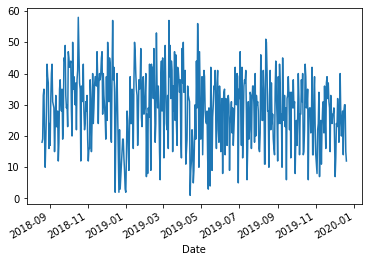

In [ ]:
traffic_df.groupby(['Date']).size().plot()

In [ ]:
year_traffic_df = traffic_df.loc[traffic_df['Date'] < '2019-08-20']
year_traffic_df.tail(3)

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Hour,Day_of_Week
10732,2019-08-19,7:32 PM,Quezon City,EDSA TIMOG FLYOVER,14.632910,121.044944,NB,STALLED ARMORED VAN DUE TO MECHANICAL PROBLEM,1.0,ARMORED VAN,MMDA ALERT: Stalled Armored van due to mechani...,https://twitter.com/mmda/status/11634166837231...,19,0
10733,2019-08-19,8:32 PM,Mandaluyong,EDSA SHAW TUNNEL,14.581153,121.053565,NB,NaN,1.0,PICK-UP,MMDA ALERT: Stalled Pick-up due to mechanical ...,https://twitter.com/mmda/status/11634307352245...,20,0
10734,2019-08-19,11:31 PM,Quezon City,MINDANAO AVE TUNNEL,14.690509,121.027812,SB,STALLED CLOSED VAN DUE TO MECHANICAL PROBLEM,1.0,CLOSED VAN,MMDA ALERT: Stalled closed van due to mechanic...,https://twitter.com/mmda/status/11634801419572...,23,0


In [ ]:
year_traffic_df.loc[:, 'Week'] = year_traffic_df.loc[:, 'Date'] - year_traffic_df.loc[0, 'Date']
def week(timedelta):
  return timedelta.days // 7
year_traffic_df.loc[:, 'Week'] = year_traffic_df['Week'].apply(week)
year_traffic_df.tail(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Hour,Day_of_Week,Week
10730,2019-08-19,6:39 PM,Quezon City,COMMONWEALTH TANDANG SORA,14.663710,121.068008,EB,VEHICULAR ACCIDENT,1.0,CAR AND TRUCK,MMDA ALERT: Vehicular accident at Commonwealth...,https://twitter.com/mmda/status/11634036857512...,18,0,52
10731,2019-08-19,7:30 PM,Mandaluyong,EDSA SHAW SPLIT,14.581153,121.053565,NB,VEHICULAR ACCIDENT,1.0,CAR AND BUS,"MMDA ALERT: Vehicular accident at EDSA NB, Sha...",https://twitter.com/mmda/status/11634165210009...,19,0,52
10732,2019-08-19,7:32 PM,Quezon City,EDSA TIMOG FLYOVER,14.632910,121.044944,NB,STALLED ARMORED VAN DUE TO MECHANICAL PROBLEM,1.0,ARMORED VAN,MMDA ALERT: Stalled Armored van due to mechani...,https://twitter.com/mmda/status/11634166837231...,19,0,52
10733,2019-08-19,8:32 PM,Mandaluyong,EDSA SHAW TUNNEL,14.581153,121.053565,NB,NaN,1.0,PICK-UP,MMDA ALERT: Stalled Pick-up due to mechanical ...,https://twitter.com/mmda/status/11634307352245...,20,0,52
10734,2019-08-19,11:31 PM,Quezon City,MINDANAO AVE TUNNEL,14.690509,121.027812,SB,STALLED CLOSED VAN DUE TO MECHANICAL PROBLEM,1.0,CLOSED VAN,MMDA ALERT: Stalled closed van due to mechanic...,https://twitter.com/mmda/status/11634801419572...,23,0,52


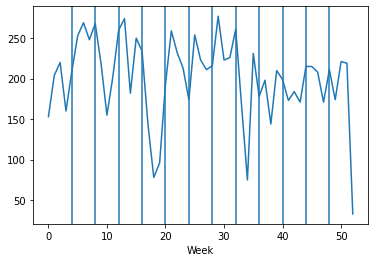

In [ ]:
year_traffic_df.groupby(['Week']).size().plot()

lines = [x for x in range(4, 52, 4)]
for line in lines:
  plt.axvline(x=line) #???? HELP

#### Day of the Week

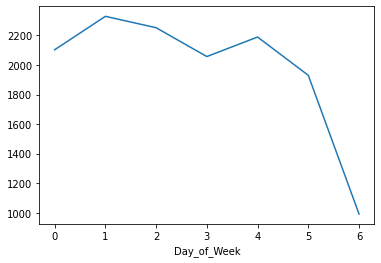

In [ ]:
traffic_df.groupby(['Day_of_Week']).size().plot() # Map? Make x ticks clearer

#### Hourly

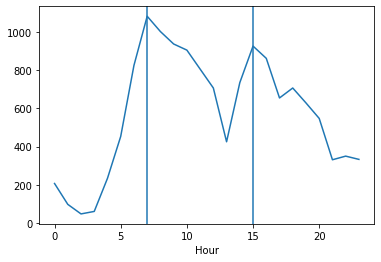

In [ ]:
traffic_df.groupby(['Hour']).size().plot()
# Change to average amount of incidents per day in one hour instead?

plt.axvline(x=7) # 7 AM
plt.axvline(x=15) # 3 PM

-- add graphs and text

## Question 2: Does the type of vehicle you're in affect if you'll get into accidents?

#### Type of Vehicle to Accidents

In [ ]:
traffic_df = pd.read_csv(link)
traffic_df.dropna(subset=['Involved', 'Type'])
involved_df = traffic_df['Involved'].str.upper()


inv_motorcycle = involved_df.str.contains('MOTOR|CYCLE|BIKE')
inv_four_public = involved_df.str.contains('^UV|EXPRESS|TAXI|PUJ|JEEP|FX|MULTICAB|AMBULANCE')
inv_four_private = involved_df.str.contains('MC|CAR|VIOS|HONDA CIVIC|INNOVA|VAN|STAREX|WIGO|MONTERO|PAJERO|HI-ACE|ACE|SUV|AUV|SCHOOL')
inv_truck = involved_df.str.contains('TRUCK|TRUNCK|TRUK|TUCK|CANTER|L300|PICK|MIXER|TANKER|TRAILER|REVO|ELF|HI-LUX|LUX')
inv_bus = involved_df.str.contains('BUS|COASTER|METROLINK')

traffic_df['Bus'] = np.where(inv_bus, 1, 0)
traffic_df['FourWheeled_Public'] = np.where(inv_four_public, 1, 0)
traffic_df['FourWheeled_Private'] = np.where(inv_four_private, 1, 0)
traffic_df['Truck'] = np.where(inv_truck, 1, 0)
traffic_df['Motorcycle'] = np.where(inv_motorcycle, 1, 0)

-- add graphs and text

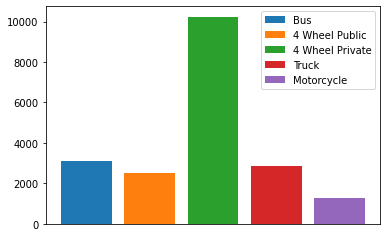

In [ ]:
plt.bar(1, traffic_df['Bus'].sum(), label='Bus')
plt.bar(2, traffic_df['FourWheeled_Public'].sum(), label='4 Wheel Public')
plt.bar(3, traffic_df['FourWheeled_Private'].sum(), label='4 Wheel Private')
plt.bar(4, traffic_df['Truck'].sum(), label='Truck')
plt.bar(5, traffic_df['Motorcycle'].sum(), label='Motorcycle')
plt.xticks(ticks=[])
plt.legend()

#### Checking type of Incident

In [ ]:
type_df = traffic_df['Type'].str.upper()

type_e = type_df.str.contains('RALLY|PARADE|SALE|WREATH|MARCH|CAMPAIGN|ACTIVITY|PHOTO|CARAVAN')
type_sa = type_df.str.contains('SELF ACCIDENT')
type_va = type_df.str.contains('VEHICULAR|ACCIDENT|FIRE')
type_har = type_df.str.contains('HIT AND RUN')
type_d = type_df.str.contains('ROAD|CLOSURE|WORK|DECLOGGING|PROJECT|DPWH|OPERATION|MMDA|WATER|CEMENT|LANE|MAYNILAD|DRAINAGE|DISMANTLING|MANHOLE|REPAIR|SPILL|TRAFFIC|FALLEN|BOX')
type_mc = type_df.str.contains('MULTIPLE|COLLISION')
type_si = type_df.str.contains('SHOOTING|STABBING')
type_s = type_df.str.contains('STALL')

traffic_df['Type'] = np.where(type_va, 'VEHICULAR ACCIDENT OR FIRE',
                              np.where(type_s, 'STALLED VEHICLE', 
                                        np.where(type_mc, 'MULTIPLE COLLISION',
                                                  np.where(type_sa, 'SELF ACCIDENT', 
                                                          np.where(type_e, "RALLY, PARADE OR MISC. PUBLIC EVENT", 
                                                                  np.where(type_har, "HIT AND RUN",
                                                                          np.where(type_si, 'SHOOTING/STABBING INCIDENT',
                                                                                  np.where(type_d, 'ROAD WORK/CLOSURE', type_df))))))))
traffic_df['Type'].value_counts()

VEHICULAR ACCIDENT OR FIRE             9823
STALLED VEHICLE                        3151
MULTIPLE COLLISION                      564
ROAD WORK/CLOSURE                       259
RALLY, PARADE OR MISC. PUBLIC EVENT     122
HIT AND RUN                              32
SHOOTING/STABBING INCIDENT               16
Name: Type, dtype: int64

-- add graphs and text

In [ ]:
# Code to plot vehicular accidents/stalled vehicle for the categories of vehicles

## Question 3: Where do these incidents happen more often?

#### City

In [ ]:
traffic_df['City'].unique()

array(['Pasig City', 'Mandaluyong', 'Makati City', 'San Juan',
       'Quezon City', 'Marikina', 'Pasay City', 'ParaÃ±aque', 'Manila',
       nan, 'Kalookan City', 'Malabon', 'Taguig', 'Navotas', 'Valenzuela'],
      dtype=object)

In [ ]:
traffic_df.dropna(subset=['City'], inplace=True)
traffic_df['City'].unique()

array(['Pasig City', 'Mandaluyong', 'Makati City', 'San Juan',
       'Quezon City', 'Marikina', 'Pasay City', 'ParaÃ±aque', 'Manila',
       'Kalookan City', 'Malabon', 'Taguig', 'Navotas', 'Valenzuela'],
      dtype=object)

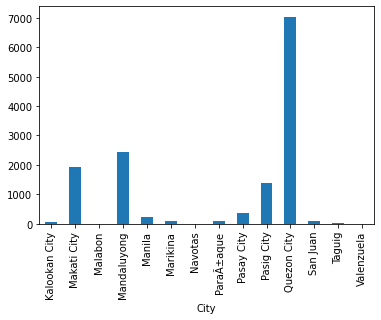

In [ ]:
traffic_df.groupby(['City']).size().plot(kind='bar')

-- add graphs and text

#### Direction

In [ ]:
traffic_df = pd.read_csv(link)
traffic_df['Direction'].unique()

array(['EB', 'NB', 'SB', 'EB.', 'WB', 'DAR', nan, 'CLOSED', 'PAX',
       'CLARA'], dtype=object)

In [ ]:
traffic_df.dropna(subset=['Direction'], inplace=True)
traffic_df['Direction'].isnull().any()

False

In [ ]:
traffic_df['Direction'] = traffic_df['Direction'].map({'NB': 'NB', 
                                                      'EB': 'EB', 
                                                      'EB.': 'EB', 
                                                      'WB': 'WB', 
                                                      'SB': 'SB',
                                                      'DAR': 'DAR',
                                                      'CLOSED': 'CLOSED',
                                                      'PAX': 'PAX',
                                                      'CLARA': 'CLARA'},
                                                      na_action = 'ignore')
traffic_df['Direction'] = traffic_df['Direction'].astype('string')
traffic_df['Direction'].unique()

<StringArray>
['EB', 'NB', 'SB', 'WB', 'DAR', 'CLOSED', 'PAX', 'CLARA']
Length: 8, dtype: string

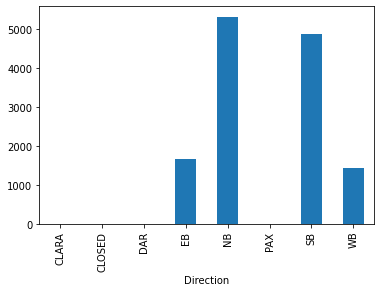

In [ ]:
traffic_df.groupby(['Direction']).size().plot(kind='bar')

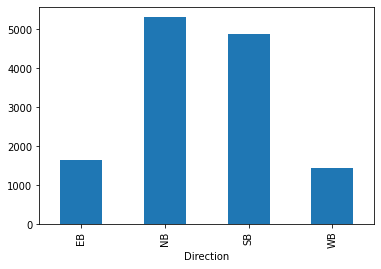

In [ ]:
direction_df = traffic_df[(traffic_df['Direction'] == 'EB') | (traffic_df['Direction'] == 'NB') |
                          (traffic_df['Direction'] == 'SB') | (traffic_df['Direction'] == 'WB')]
direction_df.groupby(['Direction']).size().plot(kind='bar')                

-- add graphs and text